In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Supervised Learning Part 1 -- Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.


First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0, cluster_std=1.5)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)


In [3]:
print('First 5 samples:\n', X[:5, :])

First 5 samples:
 [[ 5.30012145  2.90245558]
 [ 0.33406454  0.24093359]
 [-0.90292296  5.47002286]
 [-0.35540854  1.33259263]
 [ 3.83731221  1.37307758]]


In [4]:
print('First 5 labels:', y[:5])

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

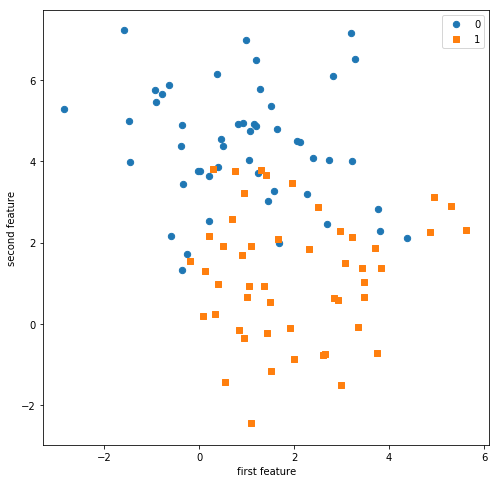

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1',
            marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

<img src="figures/train_test_split_matrix.svg" width="100%">


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

### The scikit-learn estimator API
<img src="figures/supervised_workflow.svg" width="100%">


Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [7]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object.

In [8]:
classifier = LogisticRegression()

In [9]:
X_train.shape

(75, 2)

In [10]:
y_train.shape

(75,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [11]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [12]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [13]:
print(prediction)
print(y_test)

[1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [14]:
np.mean(prediction == y_test)

0.71999999999999997

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [15]:
classifier.score(X_test, y_test)

0.71999999999999997

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [16]:
classifier.score(X_train, y_train)

0.89333333333333331

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

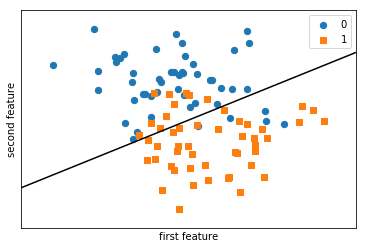

In [17]:
from figures import plot_2d_separator

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [18]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.7266808  -1.04926164]]
[ 1.44869382]


Another classifier: K Nearest Neighbors
------------------------------------------------
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for ``LogisticRegression above``.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [20]:
knn = KNeighborsClassifier(n_neighbors=30)

We fit the model with out training data

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

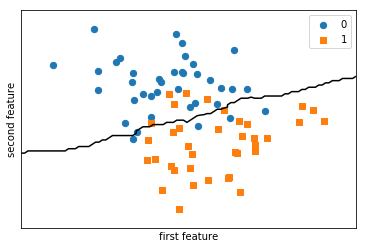

In [22]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            s=40, label='0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [23]:
knn.score(X_train, y_train)

0.88

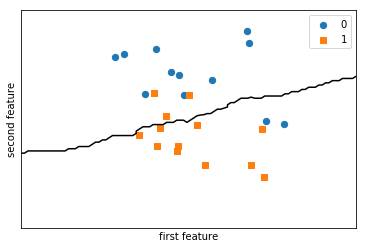

In [24]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            s=40, label='0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [25]:
knn.score(X_test, y_test)

0.80000000000000004

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.
      </li>
    </ul>
</div>

In [ ]:
# %load solutions/05A_knn_with_diff_k.py

Copyright Scipy 2018 scikit-learn tutorial by Guillaume Lemaitre and Andreas Mueller. This work is licensed under the Creative Commons Attribution 4.0 International license agreement.